In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imputed Datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
import glob

# Set the folder path
folder_path = "/content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets"

# Get all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Print the list of CSV files
# print(f"Found CSV files: \n", csv_files, "\n")

# Create a dictionary with filenames as keys and their paths as values
file_dict = {os.path.splitext(os.path.basename(file))[0]: file for file in csv_files}

# Print the dictionary
print(file_dict)

for file in csv_files:
  print(f"{file} \n")

{'knn_imputed': '/content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/knn_imputed.csv', 'imputed_interpolate': '/content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/imputed_interpolate.csv', 'imputed_MICE': '/content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/imputed_MICE.csv', 'mean_athlete_dataset': '/content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/mean_athlete_dataset.csv', 'mode_athlete_dataset': '/content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/mode_athlete_dataset.csv', 'median_athlete_dataset': '/content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/median_athlete_dataset.csv', 'em_imputed': '/content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/em_imputed.csv'}
/content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/knn_imputed.csv 

/content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/imputed_interpolate.csv 

/content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/imputed_MICE.csv 

/content/drive/MyDrive/ML_Project_

# Correlation Map

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the directory to save heatmaps
heatmap_save_dir = "/content/drive/MyDrive/ML_Project_Dataset/Correlation_Heatmaps"
os.makedirs(heatmap_save_dir, exist_ok=True)  # Ensure the directory exists

# Reload the imputed dataset
for file in csv_files:
  print(f"\nProcessing Dataset: {file}")
  df_imputed = pd.read_csv(file)

  # Check correlation of sleep and recovery features with RSImod
  sleep_recovery_features = [
      "RHR", "HRV", "Recovery", "Sleep.Score", "Hours.in.Bed", "Hours.of.Sleep",
      "Sleep.Efficiency....", "Wake.Periods", "Sleep.Disturbances", "Latency..min.",
      "Cycles", "REM.Sleep..hours.", "Deep.Sleep..hours.", "Light.Sleep..hours.",
      "Awake..hours.", "Sleep.Debt..hours.", "Sleep.Consistency", "Respiratory.Rate",
      "Total.Cycle.Sleep.Time..hours.", "REM.Percentage", "Deep.Sleep.Percentage",
      "Restorative.Sleep..hours.", "Restorative.Sleep...."
  ]

  # Compute correlation with RSImod
  correlation_values = df_imputed[sleep_recovery_features + ["RSI"]].corr()["RSI"].sort_values(ascending=False)

  # Plot correlation heatmap
  for filename, filepath in file_dict.items():
    if filename in file:
      plt.figure(figsize=(20, 10))
      sns.heatmap(df_imputed[sleep_recovery_features + ["RSI"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
      plt.title(f"Correlation Heatmap of Sleep & Recovery Features with RSImod: {filename}")
      # plt.show()
      # Save the figure
      save_path = os.path.join(heatmap_save_dir, f"{filename}_correlation_heatmap.png")
      plt.savefig(save_path, bbox_inches="tight", dpi=300)
      plt.close()  # Close the plot to free memory

      print(f"Saved heatmap: {save_path}")



Processing Dataset: /content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/knn_imputed.csv
Saved heatmap: /content/drive/MyDrive/ML_Project_Dataset/Correlation_Heatmaps/knn_imputed_correlation_heatmap.png

Processing Dataset: /content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/imputed_interpolate.csv
Saved heatmap: /content/drive/MyDrive/ML_Project_Dataset/Correlation_Heatmaps/imputed_interpolate_correlation_heatmap.png

Processing Dataset: /content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/imputed_MICE.csv
Saved heatmap: /content/drive/MyDrive/ML_Project_Dataset/Correlation_Heatmaps/imputed_MICE_correlation_heatmap.png

Processing Dataset: /content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/mean_athlete_dataset.csv
Saved heatmap: /content/drive/MyDrive/ML_Project_Dataset/Correlation_Heatmaps/mean_athlete_dataset_correlation_heatmap.png

Processing Dataset: /content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/mode_athlete_dataset.csv
Saved heatmap: /con

In [4]:
original_dataset = pd.read_csv("/content/drive/MyDrive/ML_Project_Dataset/Given_Dataset/Athlete_Readiness.csv")
original_dataset.fillna(0, inplace=True)
print(original_dataset.isna().sum().sum())

0


# 3rd Milestone: Train a model to predict the RSImod based on the sleep and recovery features.

Models to Try:

✅ Linear Regression (Baseline model)

✅ Ridge & Lasso Regression (Regularized models)

✅ Random Forest Regressor (Non-linear, tree-based model)

✅ Gradient Boosting (XGBoost, LightGBM) (Powerful boosting models)

✅ Support Vector Regression (SVR) (For complex relationships)

Evaluation Metrics:
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- R² Score (Explained Variance)

## Spliting the datasets in train and test

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define target variable and features
target = "RSI"
features = sleep_recovery_features

# Dictionary to store processed datasets
processed_datasets = {}

# Loop through all imputed datasets
for file in csv_files:
    print(f"\nProcessing Dataset: {file}")

    # Load dataset
    df = pd.read_csv(file)

    # Ensure all features are numeric
    df[features] = df[features].apply(pd.to_numeric, errors="coerce")

    # Drop rows with NaN values
    df_cleaned = df.dropna(subset=features + [target])

    # Split data into training and testing sets
    X = df_cleaned[features]
    y = df_cleaned[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Store processed data in a dictionary with the filename as key
    filename = file.split("/")[-1].replace(".csv", "")  # Extract filename without extension
    processed_datasets[filename] = {
        "X_train": X_train_scaled,
        "X_test": X_test_scaled,
        "y_train": y_train,
        "y_test": y_test
    }

    # Display dataset shape after preprocessing
    print(f"{filename}: X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")



Processing Dataset: /content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/knn_imputed.csv
knn_imputed: X_train: (2488, 23), X_test: (623, 23), y_train: (2488,), y_test: (623,)

Processing Dataset: /content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/imputed_interpolate.csv
imputed_interpolate: X_train: (2488, 23), X_test: (623, 23), y_train: (2488,), y_test: (623,)

Processing Dataset: /content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/imputed_MICE.csv
imputed_MICE: X_train: (2488, 23), X_test: (623, 23), y_train: (2488,), y_test: (623,)

Processing Dataset: /content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/mean_athlete_dataset.csv
mean_athlete_dataset: X_train: (2488, 23), X_test: (623, 23), y_train: (2488,), y_test: (623,)

Processing Dataset: /content/drive/MyDrive/ML_Project_Dataset/Imputed_Datasets/mode_athlete_dataset.csv
mode_athlete_dataset: X_train: (2488, 23), X_test: (623, 23), y_train: (2488,), y_test: (623,)

Processing Dataset: /content/drive/

Here, 2488 training samples and 623 test samples, as we divided the dataset into 80-20.

There are 23 sleep and recovery features

# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dictionary to store evaluation metrics
linear_model_metrics = {}

# Loop through all processed datasets
for filename, data in processed_datasets.items():
    print(f"\nTraining Linear Regression on {filename}...")

    # Extract train and test data
    X_train_scaled = data["X_train"]
    X_test_scaled = data["X_test"]
    y_train = data["y_train"]
    y_test = data["y_test"]

    # Train Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)

    # Predict on test set
    y_pred_lr = lr_model.predict(X_test_scaled)

    # Evaluate model performance
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    rmse_lr = mean_squared_error(y_test, y_pred_lr)  # RMSE (squared=False for root mean)
    r2_lr = r2_score(y_test, y_pred_lr)

    # Store metrics in dictionary
    linear_model_metrics[filename] = {
        "MAE": mae_lr,
        "RMSE": rmse_lr,
        "R2 Score": r2_lr
    }

    # Print metrics for each dataset
    print(f"Linear Regression Metrics for {filename}:")
    print(f"MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f}, R2 Score: {r2_lr:.4f}")

# Display all model metrics
linear_model_metrics



Training Linear Regression on knn_imputed...
Linear Regression Metrics for knn_imputed:
MAE: 0.0203, RMSE: 0.0010, R2 Score: 0.1670

Training Linear Regression on imputed_interpolate...
Linear Regression Metrics for imputed_interpolate:
MAE: 0.0758, RMSE: 0.0119, R2 Score: 0.0398

Training Linear Regression on imputed_MICE...
Linear Regression Metrics for imputed_MICE:
MAE: 0.0029, RMSE: 0.0002, R2 Score: 0.8987

Training Linear Regression on mean_athlete_dataset...
Linear Regression Metrics for mean_athlete_dataset:
MAE: 0.0046, RMSE: 0.0003, R2 Score: -0.0113

Training Linear Regression on mode_athlete_dataset...
Linear Regression Metrics for mode_athlete_dataset:
MAE: 0.0049, RMSE: 0.0003, R2 Score: -0.0115

Training Linear Regression on median_athlete_dataset...
Linear Regression Metrics for median_athlete_dataset:
MAE: 0.0046, RMSE: 0.0003, R2 Score: -0.0123

Training Linear Regression on em_imputed...
Linear Regression Metrics for em_imputed:
MAE: 0.0039, RMSE: 0.0003, R2 Score:

{'knn_imputed': {'MAE': 0.02033317717175117,
  'RMSE': 0.0009912561896791004,
  'R2 Score': 0.16703867651265525},
 'imputed_interpolate': {'MAE': 0.0758168195380407,
  'RMSE': 0.011901032917659777,
  'R2 Score': 0.03981530427094149},
 'imputed_MICE': {'MAE': 0.0028657885880954454,
  'RMSE': 0.00015821449618127017,
  'R2 Score': 0.8986727776897934},
 'mean_athlete_dataset': {'MAE': 0.004573459493478008,
  'RMSE': 0.0002911353374856357,
  'R2 Score': -0.01126358743536593},
 'mode_athlete_dataset': {'MAE': 0.004878518566614552,
  'RMSE': 0.0003350827633509721,
  'R2 Score': -0.011452059347357713},
 'median_athlete_dataset': {'MAE': 0.004632619139632403,
  'RMSE': 0.00031986164505049257,
  'R2 Score': -0.012304698904240352},
 'em_imputed': {'MAE': 0.0039007248143752785,
  'RMSE': 0.00028797360834855525,
  'R2 Score': 0.6850619256241053}}

In [10]:
import pandas as pd

# Assuming linear_model_metrics is a dictionary with model names as keys and their metric values
df_metrics = pd.DataFrame.from_dict(linear_model_metrics, orient="index", columns=["MAE", "RMSE", "R2 Score"])

# Display the table
print(df_metrics)


                             MAE      RMSE  R2 Score
knn_imputed             0.020333  0.000991  0.167039
imputed_interpolate     0.075817  0.011901  0.039815
imputed_MICE            0.002866  0.000158  0.898673
mean_athlete_dataset    0.004573  0.000291 -0.011264
mode_athlete_dataset    0.004879  0.000335 -0.011452
median_athlete_dataset  0.004633  0.000320 -0.012305
em_imputed              0.003901  0.000288  0.685062


In [21]:
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()
table.field_names = ["Dataset", "MAE", "RMSE", "R2 Score"]

# Loop through dictionary and add rows
for dataset, metrics in linear_model_metrics.items():
    table.add_row([dataset, metrics["MAE"], metrics["RMSE"], metrics["R2 Score"]])

# Print the table
print("Linear Regression Model Metrics: ")
print(table)


Linear Regression Model Metrics: 
+------------------------+-----------------------+------------------------+-----------------------+
|        Dataset         |          MAE          |          RMSE          |        R2 Score       |
+------------------------+-----------------------+------------------------+-----------------------+
|      knn_imputed       |  0.02033317717175117  | 0.0009912561896791004  |  0.16703867651265525  |
|  imputed_interpolate   |   0.0758168195380407  |  0.011901032917659777  |  0.03981530427094149  |
|      imputed_MICE      | 0.0028657885880954454 | 0.00015821449618127017 |   0.8986727776897934  |
|  mean_athlete_dataset  |  0.004573459493478008 | 0.0002911353374856357  |  -0.01126358743536593 |
|  mode_athlete_dataset  |  0.004878518566614552 | 0.0003350827633509721  | -0.011452059347357713 |
| median_athlete_dataset |  0.004632619139632403 | 0.00031986164505049257 | -0.012304698904240352 |
|       em_imputed       | 0.0039007248143752785 | 0.0002879736083

As $R^2$ score is low in Linear Regression, which indicates it poor fit

# Ridge and Lasso Regression

In [18]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dictionary to store evaluation metrics
# ridge_model_metrics = {}
# lasso_model_metrics = {}
ridge_lasso_regression_results = {}

# Loop through all processed datasets
for filename, data in processed_datasets.items():
    print(f"\nTraining Ridge and Lasso Regression on {filename}...")

    # Extract train and test data
    X_train_scaled = data["X_train"]
    X_test_scaled = data["X_test"]
    y_train = data["y_train"]
    y_test = data["y_test"]

    # Train Ridge Regression model
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge_model.predict(X_test_scaled)

    # Train Lasso Regression model
    lasso_model = Lasso(alpha=0.01)
    lasso_model.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso_model.predict(X_test_scaled)

    # Evaluate both models
    mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
    rmse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)

    mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
    rmse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)

    # Evaluate models
    ridge_lasso_regression_results[filename] = {
        'Ridge': {
            'MAE': mae_ridge,
            'RMSE': rmse_ridge,
            'R2 Score': r2_ridge,
        },
        'Lasso': {
            'MAE': mae_lasso,
            'RMSE': rmse_lasso,
            'R2 Score': r2_lasso,
        }
    }

# Print results
for filename, results in ridge_lasso_regression_results.items():
    print(f"\nDataset: {filename}")
    for model, metrics in results.items():
        print(f"{model} Regression - MAE: {metrics['MAE']:.4f}, RMSE: {metrics['RMSE']:.4f}, R2 Score: {metrics['R2 Score']:.4f}")

ridge_lasso_regression_results



Training Linear Regression on knn_imputed...

Training Linear Regression on imputed_interpolate...

Training Linear Regression on imputed_MICE...

Training Linear Regression on mean_athlete_dataset...

Training Linear Regression on mode_athlete_dataset...

Training Linear Regression on median_athlete_dataset...

Training Linear Regression on em_imputed...

Dataset: knn_imputed
Ridge Regression - MAE: 0.0204, RMSE: 0.0010, R2 Score: 0.1655
Lasso Regression - MAE: 0.0215, RMSE: 0.0012, R2 Score: 0.0296

Dataset: imputed_interpolate
Ridge Regression - MAE: 0.0757, RMSE: 0.0119, R2 Score: 0.0400
Lasso Regression - MAE: 0.0753, RMSE: 0.0124, R2 Score: 0.0030

Dataset: imputed_MICE
Ridge Regression - MAE: 0.0028, RMSE: 0.0002, R2 Score: 0.8983
Lasso Regression - MAE: 0.0190, RMSE: 0.0009, R2 Score: 0.4115

Dataset: mean_athlete_dataset
Ridge Regression - MAE: 0.0045, RMSE: 0.0003, R2 Score: -0.0116
Lasso Regression - MAE: 0.0031, RMSE: 0.0003, R2 Score: -0.0036

Dataset: mode_athlete_datase

{'knn_imputed': {'Ridge': {'MAE': 0.020357037417470462,
   'RMSE': 0.0009931044238355165,
   'R2 Score': 0.1654855890413517},
  'Lasso': {'MAE': 0.021478412902409268,
   'RMSE': 0.0011548628993762401,
   'R2 Score': 0.029558514613382103}},
 'imputed_interpolate': {'Ridge': {'MAE': 0.07565226151790168,
   'RMSE': 0.0118987852105191,
   'R2 Score': 0.0399966510508295},
  'Lasso': {'MAE': 0.07525702465722155,
   'RMSE': 0.012357174149054557,
   'R2 Score': 0.0030134709757523304}},
 'imputed_MICE': {'Ridge': {'MAE': 0.0027795425573618644,
   'RMSE': 0.0001587748133312064,
   'R2 Score': 0.898313927004261},
  'Lasso': {'MAE': 0.019028595740922957,
   'RMSE': 0.0009189155201095371,
   'R2 Score': 0.41148782546601503}},
 'mean_athlete_dataset': {'Ridge': {'MAE': 0.0044928647248737835,
   'RMSE': 0.0002912367619557542,
   'R2 Score': -0.01161588707165051},
  'Lasso': {'MAE': 0.0030659654302126623,
   'RMSE': 0.0002889224469720066,
   'R2 Score': -0.003577074287422377}},
 'mode_athlete_dataset'

In [22]:
from prettytable import PrettyTable

# Create tables for Ridge and Lasso separately
ridge_table = PrettyTable()
lasso_table = PrettyTable()

# Define column headers
ridge_table.field_names = ["Dataset", "MAE", "RMSE", "R2 Score"]
lasso_table.field_names = ["Dataset", "MAE", "RMSE", "R2 Score"]

# Loop through results and add rows to respective tables
for dataset, models in ridge_lasso_regression_results.items():
    ridge_metrics = models["Ridge"]
    lasso_metrics = models["Lasso"]

    ridge_table.add_row([dataset, ridge_metrics["MAE"], ridge_metrics["RMSE"], ridge_metrics["R2 Score"]])
    lasso_table.add_row([dataset, lasso_metrics["MAE"], lasso_metrics["RMSE"], lasso_metrics["R2 Score"]])

# Print the tables
print("\nRidge Regression Metrics:")
print(ridge_table)

print("\nLasso Regression Metrics:")
print(lasso_table)



Ridge Regression Metrics:
+------------------------+-----------------------+------------------------+-----------------------+
|        Dataset         |          MAE          |          RMSE          |        R2 Score       |
+------------------------+-----------------------+------------------------+-----------------------+
|      knn_imputed       |  0.020357037417470462 | 0.0009931044238355165  |   0.1654855890413517  |
|  imputed_interpolate   |  0.07565226151790168  |   0.0118987852105191   |   0.0399966510508295  |
|      imputed_MICE      | 0.0027795425573618644 | 0.0001587748133312064  |   0.898313927004261   |
|  mean_athlete_dataset  | 0.0044928647248737835 | 0.0002912367619557542  |  -0.01161588707165051 |
|  mode_athlete_dataset  |  0.004879022957779792 | 0.0003350252682604101  | -0.011278509603498188 |
| median_athlete_dataset |  0.004649090170315404 | 0.0003197426865378657  | -0.011928216562045568 |
|       em_imputed       | 0.0038544742084191254 | 0.00028876580810258237

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dictionary to store evaluation metrics
random_forest_model_metrics = {}

# Loop through all processed datasets
for filename, data in processed_datasets.items():
    print(f"\nTraining Random Forest Regression on {filename}...")

    # Extract train and test data
    X_train_scaled = data["X_train"]
    X_test_scaled = data["X_test"]
    y_train = data["y_train"]
    y_test = data["y_test"]

    # Train Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)

    # Predict on test set
    y_pred_rf = rf_model.predict(X_test_scaled)

    # Evaluate Random Forest model
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    rmse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    # Store metrics in dictionary
    random_forest_model_metrics[filename] = {
        "MAE": mae_rf,
        "RMSE": rmse_rf,
        "R2 Score": r2_rf
    }

    # Print metrics for each dataset
    print(f"Linear Regression Metrics for {filename}:")
    print(f"MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R2 Score: {r2_rf:.4f}")

# Display all model metrics
random_forest_model_metrics



Training Random Forest Regression on knn_imputed...
Linear Regression Metrics for knn_imputed:
MAE: 0.0139, RMSE: 0.0006, R2 Score: 0.4830

Training Random Forest Regression on imputed_interpolate...
Linear Regression Metrics for imputed_interpolate:
MAE: 0.0556, RMSE: 0.0078, R2 Score: 0.3743

Training Random Forest Regression on imputed_MICE...
Linear Regression Metrics for imputed_MICE:
MAE: 0.0102, RMSE: 0.0004, R2 Score: 0.7491

Training Random Forest Regression on mean_athlete_dataset...
Linear Regression Metrics for mean_athlete_dataset:
MAE: 0.0057, RMSE: 0.0004, R2 Score: -0.2374

Training Random Forest Regression on mode_athlete_dataset...
Linear Regression Metrics for mode_athlete_dataset:
MAE: 0.0057, RMSE: 0.0004, R2 Score: -0.1638

Training Random Forest Regression on median_athlete_dataset...
Linear Regression Metrics for median_athlete_dataset:
MAE: 0.0056, RMSE: 0.0004, R2 Score: -0.1896

Training Random Forest Regression on em_imputed...
Linear Regression Metrics for

{'knn_imputed': {'MAE': 0.013911030911821854,
  'RMSE': 0.0006152334750198349,
  'R2 Score': 0.4830138818380135},
 'imputed_interpolate': {'MAE': 0.05555416689858748,
  'RMSE': 0.007755580317677651,
  'R2 Score': 0.37427368035581154},
 'imputed_MICE': {'MAE': 0.010224174457015758,
  'RMSE': 0.00039177645435605374,
  'R2 Score': 0.749089869483528},
 'mean_athlete_dataset': {'MAE': 0.005662214234537527,
  'RMSE': 0.00035623813449471006,
  'R2 Score': -0.23739926929405208},
 'mode_athlete_dataset': {'MAE': 0.005729942641205406,
  'RMSE': 0.0003855426946574923,
  'R2 Score': -0.16376607551490396},
 'median_athlete_dataset': {'MAE': 0.005557152239496464,
  'RMSE': 0.00037587488432600874,
  'R2 Score': -0.18957654814550096},
 'em_imputed': {'MAE': 0.005965103812038615,
  'RMSE': 0.00032473299632503527,
  'R2 Score': 0.6448605650517272}}

In [26]:
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()
table.field_names = ["Dataset", "MAE", "RMSE", "R2 Score"]

# Loop through dictionary and add rows
for dataset, metrics in random_forest_model_metrics.items():
    table.add_row([dataset, metrics["MAE"], metrics["RMSE"], metrics["R2 Score"]])

# Print the table
print("Random Forest Regression Model Metrics: ")
print(table)


Random Forest Regression Model Metrics: 
+------------------------+----------------------+------------------------+----------------------+
|        Dataset         |         MAE          |          RMSE          |       R2 Score       |
+------------------------+----------------------+------------------------+----------------------+
|      knn_imputed       | 0.013911030911821854 | 0.0006152334750198349  |  0.4830138818380135  |
|  imputed_interpolate   | 0.05555416689858748  |  0.007755580317677651  | 0.37427368035581154  |
|      imputed_MICE      | 0.010224174457015758 | 0.00039177645435605374 |  0.749089869483528   |
|  mean_athlete_dataset  | 0.005662214234537527 | 0.00035623813449471006 | -0.23739926929405208 |
|  mode_athlete_dataset  | 0.005729942641205406 | 0.0003855426946574923  | -0.16376607551490396 |
| median_athlete_dataset | 0.005557152239496464 | 0.00037587488432600874 | -0.18957654814550096 |
|       em_imputed       | 0.005965103812038615 | 0.00032473299632503527 |  0

# Gradient Boosting Models (XGBoost, LightGBM)

In [27]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgboost_lightgbm_regression_results = {}

# Loop through all processed datasets
for filename, data in processed_datasets.items():
    print(f"\nTraining Ridge and Lasso Regression on {filename}...")

    # Extract train and test data
    X_train_scaled = data["X_train"]
    X_test_scaled = data["X_test"]
    y_train = data["y_train"]
    y_test = data["y_test"]

    # Train XGBoost Regressor
    xgb_model = XGBRegressor(n_estimators=100, random_state=42)
    xgb_model.fit(X_train_scaled, y_train)
    y_pred_xgb = xgb_model.predict(X_test_scaled)

    # Train LightGBM Regressor
    lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
    lgb_model.fit(X_train_scaled, y_train)
    y_pred_lgb = lgb_model.predict(X_test_scaled)

    # Evaluate both models
    mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
    rmse_xgb = mean_squared_error(y_test, y_pred_xgb)
    r2_xgb = r2_score(y_test, y_pred_xgb)

    mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
    rmse_lgb = mean_squared_error(y_test, y_pred_lgb)
    r2_lgb = r2_score(y_test, y_pred_lgb)

    # Evaluate models
    xgboost_lightgbm_regression_results[filename] = {
        'XGBoost': {
            'MAE': mae_xgb,
            'RMSE': rmse_xgb,
            'R2 Score': r2_xgb,
        },
        'LightGBM': {
            'MAE': mae_lgb,
            'RMSE': rmse_lgb,
            'R2 Score': r2_lgb,
        }
    }

# Print results
for filename, results in xgboost_lightgbm_regression_results.items():
    print(f"\nDataset: {filename}")
    for model, metrics in results.items():
        print(f"{model} Regression - MAE: {metrics['MAE']:.4f}, RMSE: {metrics['RMSE']:.4f}, R2 Score: {metrics['R2 Score']:.4f}")

xgboost_lightgbm_regression_results



Training Ridge and Lasso Regression on knn_imputed...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001522 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3835
[LightGBM] [Info] Number of data points in the train set: 2488, number of used features: 23
[LightGBM] [Info] Start training from score 0.375456

Training Ridge and Lasso Regression on imputed_interpolate...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5865
[LightGBM] [Info] Number of data points in the train set: 2488, number of used features: 23
[LightGBM] [Info] Start training from score 0.382502


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Training Ridge and Lasso Regression on imputed_MICE...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3994
[LightGBM] [Info] Number of data points in the train set: 2488, number of used features: 23
[LightGBM] [Info] Start training from score 0.389330

Training Ridge and Lasso Regression on mean_athlete_dataset...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3645
[LightGBM] [Info] Number of data points in the train set: 2488, number of used features: 23
[LightGBM] [Info] Start training from score 0.377781

Training Ridge and Lasso Regression on mode_athlete_dataset...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3612
[LightGBM] [Info] Number of data points in the train set: 2488, number of used features: 23
[LightGBM] [Info] Start training from score 0.360888


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Training Ridge and Lasso Regression on median_athlete_dataset...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3605
[LightGBM] [Info] Number of data points in the train set: 2488, number of used features: 23
[LightGBM] [Info] Start training from score 0.365581

Training Ridge and Lasso Regression on em_imputed...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4088
[LightGBM] [Info] Number of data points in the train set: 2488, number of used features: 23
[LightGBM] [Info] Start training from score 0.377681

Dataset: knn_imputed
XGBoost Regression - MAE: 0.0142, RMSE: 0.0006, R2 Score: 0.4633
LightGBM Regression - MAE: 0.0137, RMSE: 0.0006, 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


{'knn_imputed': {'XGBoost': {'MAE': 0.014237389402325848,
   'RMSE': 0.0006386360639050257,
   'R2 Score': 0.4633484798825923},
  'LightGBM': {'MAE': 0.013721160960179687,
   'RMSE': 0.0005891630306447543,
   'R2 Score': 0.5049211063039716}},
 'imputed_interpolate': {'XGBoost': {'MAE': 0.05760535996537358,
   'RMSE': 0.007580826349754265,
   'R2 Score': 0.38837296792848697},
  'LightGBM': {'MAE': 0.05642432008933605,
   'RMSE': 0.007612271883875058,
   'R2 Score': 0.3858359175043169}},
 'imputed_MICE': {'XGBoost': {'MAE': 0.010022312332854253,
   'RMSE': 0.0003733517737864623,
   'R2 Score': 0.7608898103810458},
  'LightGBM': {'MAE': 0.008216242211080738,
   'RMSE': 0.000306882287883441,
   'R2 Score': 0.8034596667311487}},
 'mean_athlete_dataset': {'XGBoost': {'MAE': 0.006497042212784768,
   'RMSE': 0.00034401441498668577,
   'R2 Score': -0.19493996995840135},
  'LightGBM': {'MAE': 0.006717600457682171,
   'RMSE': 0.00034435851488343614,
   'R2 Score': -0.19613520685073182}},
 'mode_a

In [28]:
from prettytable import PrettyTable

# Create tables for Ridge and Lasso separately
xgboost_table = PrettyTable()
lightgbm_table = PrettyTable()

# Define column headers
xgboost_table.field_names = ["Dataset", "MAE", "RMSE", "R2 Score"]
lightgbm_table.field_names = ["Dataset", "MAE", "RMSE", "R2 Score"]

# Loop through results and add rows to respective tables
for dataset, models in xgboost_lightgbm_regression_results.items():
    xgboost_metrics = models["XGBoost"]
    lightgbm_metrics = models["LightGBM"]

    xgboost_table.add_row([dataset, xgboost_metrics["MAE"], xgboost_metrics["RMSE"], xgboost_metrics["R2 Score"]])
    lightgbm_table.add_row([dataset, lightgbm_metrics["MAE"], lightgbm_metrics["RMSE"], lightgbm_metrics["R2 Score"]])

# Print the tables
print("\nXGBoost Regression Metrics:")
print(xgboost_table)

print("\nLightGBM Regression Metrics:")
print(lightgbm_table)



XGBoost Regression Metrics:
+------------------------+-----------------------+------------------------+----------------------+
|        Dataset         |          MAE          |          RMSE          |       R2 Score       |
+------------------------+-----------------------+------------------------+----------------------+
|      knn_imputed       |  0.014237389402325848 | 0.0006386360639050257  |  0.4633484798825923  |
|  imputed_interpolate   |  0.05760535996537358  |  0.007580826349754265  | 0.38837296792848697  |
|      imputed_MICE      |  0.010022312332854253 | 0.0003733517737864623  |  0.7608898103810458  |
|  mean_athlete_dataset  |  0.006497042212784768 | 0.00034401441498668577 | -0.19493996995840135 |
|  mode_athlete_dataset  |  0.006312120532912967 | 0.00039833560452016395 | -0.20238165483102488 |
| median_athlete_dataset | 0.0063977535348834075 | 0.0003829680349734371  | -0.21202509689004922 |
|       em_imputed       |  0.007474159172579289 | 0.0003788804326712599  |  0.5

# Model Comparison:

In [31]:
import pandas as pd

# Consolidating the model results into a structured format
model_results = {
    "knn_imputed": {
        "Ridge": ridge_lasso_regression_results["knn_imputed"]["Ridge"],
        "Lasso": ridge_lasso_regression_results["knn_imputed"]["Lasso"],
        "Random Forest": random_forest_model_metrics["knn_imputed"],
        "XGBoost": xgboost_lightgbm_regression_results["knn_imputed"]["XGBoost"],
        "LightGBM": xgboost_lightgbm_regression_results["knn_imputed"]["LightGBM"]
    },
    "imputed_interpolate": {
        "Ridge": ridge_lasso_regression_results["imputed_interpolate"]["Ridge"],
        "Lasso": ridge_lasso_regression_results["imputed_interpolate"]["Lasso"],
        "Random Forest": random_forest_model_metrics["imputed_interpolate"],
        "XGBoost": xgboost_lightgbm_regression_results["imputed_interpolate"]["XGBoost"],
        "LightGBM": xgboost_lightgbm_regression_results["imputed_interpolate"]["LightGBM"]
    },
    "imputed_MICE": {
        "Ridge": ridge_lasso_regression_results["imputed_MICE"]["Ridge"],
        "Lasso": ridge_lasso_regression_results["imputed_MICE"]["Lasso"],
        "Random Forest": random_forest_model_metrics["imputed_MICE"],
        "XGBoost": xgboost_lightgbm_regression_results["imputed_MICE"]["XGBoost"],
        "LightGBM": xgboost_lightgbm_regression_results["imputed_MICE"]["LightGBM"]
    },
    "mean_athlete_dataset": {
        "Ridge": ridge_lasso_regression_results["mean_athlete_dataset"]["Ridge"],
        "Lasso": ridge_lasso_regression_results["mean_athlete_dataset"]["Lasso"],
        "Random Forest": random_forest_model_metrics["mean_athlete_dataset"],
        "XGBoost": xgboost_lightgbm_regression_results["mean_athlete_dataset"]["XGBoost"],
        "LightGBM": xgboost_lightgbm_regression_results["mean_athlete_dataset"]["LightGBM"]
    },
    "mode_athlete_dataset": {
        "Ridge": ridge_lasso_regression_results["mode_athlete_dataset"]["Ridge"],
        "Lasso": ridge_lasso_regression_results["mode_athlete_dataset"]["Lasso"],
        "Random Forest": random_forest_model_metrics["mode_athlete_dataset"],
        "XGBoost": xgboost_lightgbm_regression_results["mode_athlete_dataset"]["XGBoost"],
        "LightGBM": xgboost_lightgbm_regression_results["mode_athlete_dataset"]["LightGBM"]
    },
    "median_athlete_dataset": {
        "Ridge": ridge_lasso_regression_results["median_athlete_dataset"]["Ridge"],
        "Lasso": ridge_lasso_regression_results["median_athlete_dataset"]["Lasso"],
        "Random Forest": random_forest_model_metrics["median_athlete_dataset"],
        "XGBoost": xgboost_lightgbm_regression_results["median_athlete_dataset"]["XGBoost"],
        "LightGBM": xgboost_lightgbm_regression_results["median_athlete_dataset"]["LightGBM"]
    },
    "em_imputed": {
        "Ridge": ridge_lasso_regression_results["em_imputed"]["Ridge"],
        "Lasso": ridge_lasso_regression_results["em_imputed"]["Lasso"],
        "Random Forest": random_forest_model_metrics["em_imputed"],
        "XGBoost": xgboost_lightgbm_regression_results["em_imputed"]["XGBoost"],
        "LightGBM": xgboost_lightgbm_regression_results["em_imputed"]["LightGBM"]
    }
}

# Creating a dataframe
comparison_data = []

for dataset, models in model_results.items():
    for model, metrics in models.items():
        comparison_data.append([
            dataset, model, metrics["MAE"], metrics["RMSE"], metrics["R2 Score"]
        ])

# Convert to DataFrame
comparison_df = pd.DataFrame(
    comparison_data, columns=["Dataset", "Model", "MAE", "RMSE", "R2 Score"]
)

# Display DataFrame
print(comparison_df)

# Save as CSV file (optional)
comparison_df.to_csv("model_comparison_table.csv", index=False)


                   Dataset          Model       MAE      RMSE  R2 Score
0              knn_imputed          Ridge  0.020357  0.000993  0.165486
1              knn_imputed          Lasso  0.021478  0.001155  0.029559
2              knn_imputed  Random Forest  0.013911  0.000615  0.483014
3              knn_imputed        XGBoost  0.014237  0.000639  0.463348
4              knn_imputed       LightGBM  0.013721  0.000589  0.504921
5      imputed_interpolate          Ridge  0.075652  0.011899  0.039997
6      imputed_interpolate          Lasso  0.075257  0.012357  0.003013
7      imputed_interpolate  Random Forest  0.055554  0.007756  0.374274
8      imputed_interpolate        XGBoost  0.057605  0.007581  0.388373
9      imputed_interpolate       LightGBM  0.056424  0.007612  0.385836
10            imputed_MICE          Ridge  0.002780  0.000159  0.898314
11            imputed_MICE          Lasso  0.019029  0.000919  0.411488
12            imputed_MICE  Random Forest  0.010224  0.000392  0

In [32]:
from google.colab import files
comparison_df.to_csv("/content/drive/MyDrive/ML_Project_Dataset/Performance_Metrics/model_comparison_table.csv", encoding = 'utf-8-sig')

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Define save directory
plot_save_dir = "/content/drive/MyDrive/ML_Project_Dataset/Performance_Metrics/"

# Ensure the directory exists
os.makedirs(plot_save_dir, exist_ok=True)

# Load the dataset (replace with your actual dataframe if already loaded)
metrics_df = pd.read_csv("model_comparison_table.csv")

# Set seaborn style
sns.set_style("whitegrid")

# Get unique datasets
datasets = metrics_df["Dataset"].unique()

# Define color palette
palette = "coolwarm"

# Function to add value labels on bars
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}',  # Format value to 4 decimal places
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

# Iterate over each dataset and generate plots
for dataset in datasets:
    dataset_df = metrics_df[metrics_df["Dataset"] == dataset]

    # Define figure and axes
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"Model Performance for {dataset}", fontsize=14, fontweight='bold')

    # MAE plot
    sns.barplot(x="Model", y="MAE", data=dataset_df, ax=axes[0], palette=palette)
    axes[0].set_title("Mean Absolute Error (MAE)")
    axes[0].set_xticklabels(dataset_df["Model"], rotation=45, ha="right")
    add_value_labels(axes[0])

    # RMSE plot
    sns.barplot(x="Model", y="RMSE", data=dataset_df, ax=axes[1], palette=palette)
    axes[1].set_title("Root Mean Squared Error (RMSE)")
    axes[1].set_xticklabels(dataset_df["Model"], rotation=45, ha="right")
    add_value_labels(axes[1])

    # R² Score plot
    sns.barplot(x="Model", y="R2 Score", data=dataset_df, ax=axes[2], palette=palette)
    axes[2].set_title("R² Score (Higher is Better)")
    axes[2].set_xticklabels(dataset_df["Model"], rotation=45, ha="right")
    add_value_labels(axes[2])

    # Adjust layout
    plt.tight_layout()

    # Define save path
    save_path = os.path.join(plot_save_dir, f"model_performance_{dataset}.png")

    # Save the figure
    plt.savefig(save_path, dpi=300, bbox_inches='tight')

    # Close the figure to free memory
    plt.close()

    print(f"Saved Model Performance Plot: {save_path}")


<ipython-input-35-f7d54c213575>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=dataset_df, ax=axes[0], palette=palette)
<ipython-input-35-f7d54c213575>:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(dataset_df["Model"], rotation=45, ha="right")
<ipython-input-35-f7d54c213575>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=dataset_df, ax=axes[1], palette=palette)
<ipython-input-35-f7d54c213575>:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
 

Saved Model Performance Plot: /content/drive/MyDrive/ML_Project_Dataset/Performance_Metrics/model_performance_knn_imputed.png


<ipython-input-35-f7d54c213575>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=dataset_df, ax=axes[0], palette=palette)
<ipython-input-35-f7d54c213575>:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(dataset_df["Model"], rotation=45, ha="right")
<ipython-input-35-f7d54c213575>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=dataset_df, ax=axes[1], palette=palette)
<ipython-input-35-f7d54c213575>:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
 

Saved Model Performance Plot: /content/drive/MyDrive/ML_Project_Dataset/Performance_Metrics/model_performance_imputed_interpolate.png


<ipython-input-35-f7d54c213575>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=dataset_df, ax=axes[0], palette=palette)
<ipython-input-35-f7d54c213575>:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(dataset_df["Model"], rotation=45, ha="right")
<ipython-input-35-f7d54c213575>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=dataset_df, ax=axes[1], palette=palette)
<ipython-input-35-f7d54c213575>:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
 

Saved Model Performance Plot: /content/drive/MyDrive/ML_Project_Dataset/Performance_Metrics/model_performance_imputed_MICE.png


<ipython-input-35-f7d54c213575>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=dataset_df, ax=axes[0], palette=palette)
<ipython-input-35-f7d54c213575>:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(dataset_df["Model"], rotation=45, ha="right")
<ipython-input-35-f7d54c213575>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=dataset_df, ax=axes[1], palette=palette)
<ipython-input-35-f7d54c213575>:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
 

Saved Model Performance Plot: /content/drive/MyDrive/ML_Project_Dataset/Performance_Metrics/model_performance_mean_athlete_dataset.png


<ipython-input-35-f7d54c213575>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=dataset_df, ax=axes[0], palette=palette)
<ipython-input-35-f7d54c213575>:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(dataset_df["Model"], rotation=45, ha="right")
<ipython-input-35-f7d54c213575>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=dataset_df, ax=axes[1], palette=palette)
<ipython-input-35-f7d54c213575>:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
 

Saved Model Performance Plot: /content/drive/MyDrive/ML_Project_Dataset/Performance_Metrics/model_performance_mode_athlete_dataset.png


<ipython-input-35-f7d54c213575>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=dataset_df, ax=axes[0], palette=palette)
<ipython-input-35-f7d54c213575>:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(dataset_df["Model"], rotation=45, ha="right")
<ipython-input-35-f7d54c213575>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=dataset_df, ax=axes[1], palette=palette)
<ipython-input-35-f7d54c213575>:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
 

Saved Model Performance Plot: /content/drive/MyDrive/ML_Project_Dataset/Performance_Metrics/model_performance_median_athlete_dataset.png


<ipython-input-35-f7d54c213575>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=dataset_df, ax=axes[0], palette=palette)
<ipython-input-35-f7d54c213575>:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(dataset_df["Model"], rotation=45, ha="right")
<ipython-input-35-f7d54c213575>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=dataset_df, ax=axes[1], palette=palette)
<ipython-input-35-f7d54c213575>:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
 

Saved Model Performance Plot: /content/drive/MyDrive/ML_Project_Dataset/Performance_Metrics/model_performance_em_imputed.png


# Combined plot

<ipython-input-37-d60bf394e930>:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
<ipython-input-37-d60bf394e930>:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
<ipython-input-37-d60bf394e930>:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


<Figure size 2000x600 with 0 Axes>

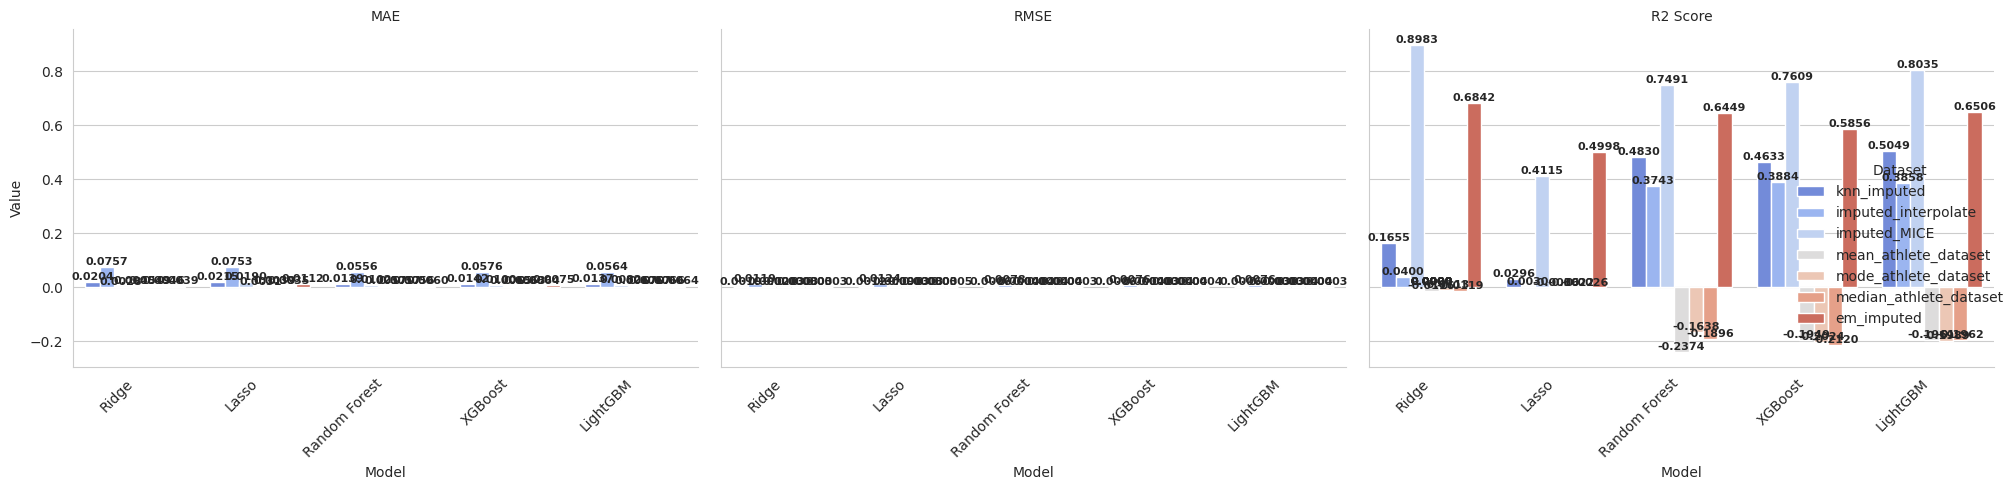

Saved Combined Model Performance Plot: /content/drive/MyDrive/ML_Project_Dataset/combined_model_performance.png


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Define save directory
combine_plot_save_dir = "/content/drive/MyDrive/ML_Project_Dataset/"

# Ensure the directory exists
os.makedirs(plot_save_dir, exist_ok=True)

# Load the dataset
metrics_df = pd.read_csv("model_comparison_table.csv")

# Set seaborn style
sns.set_style("whitegrid")

# Define color palette
palette = "coolwarm"

# Function to add value labels on bars
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}',  # Format value to 4 decimal places
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=8, fontweight='bold')

# Melt the dataframe to have a long-form dataset suitable for FacetGrid
metrics_melted = metrics_df.melt(id_vars=["Dataset", "Model"],
                                 value_vars=["MAE", "RMSE", "R2 Score"],
                                 var_name="Metric",
                                 value_name="Value")

# Define figure size
plt.figure(figsize=(20, 6))

# Create the facet grid for multiple plots in one
g = sns.catplot(data=metrics_melted, x="Model", y="Value", hue="Dataset", col="Metric",
                kind="bar", palette=palette, col_wrap=3, height=5, aspect=1.2)

# Adjust labels and rotation
g.set_titles("{col_name}")
g.set_axis_labels("Model", "Value")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    add_value_labels(ax)  # Add value labels to bars

# Adjust layout
plt.tight_layout()

# Save the combined plot
combined_plot_path = os.path.join(combine_plot_save_dir, "combined_model_performance.png")
plt.savefig(combined_plot_path, dpi=300, bbox_inches='tight')


plt.show()

print(f"Saved Combined Model Performance Plot: {combined_plot_path}")


<ipython-input-53-de75265a7bb9>:32: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.barplot(data=metrics_melted[metrics_melted["Metric"] == metric],
<ipython-input-53-de75265a7bb9>:32: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.barplot(data=metrics_melted[metrics_melted["Metric"] == metric],
<ipython-input-53-de75265a7bb9>:32: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.barplot(data=metrics_melted[metrics_melted["Metric"] == metric],


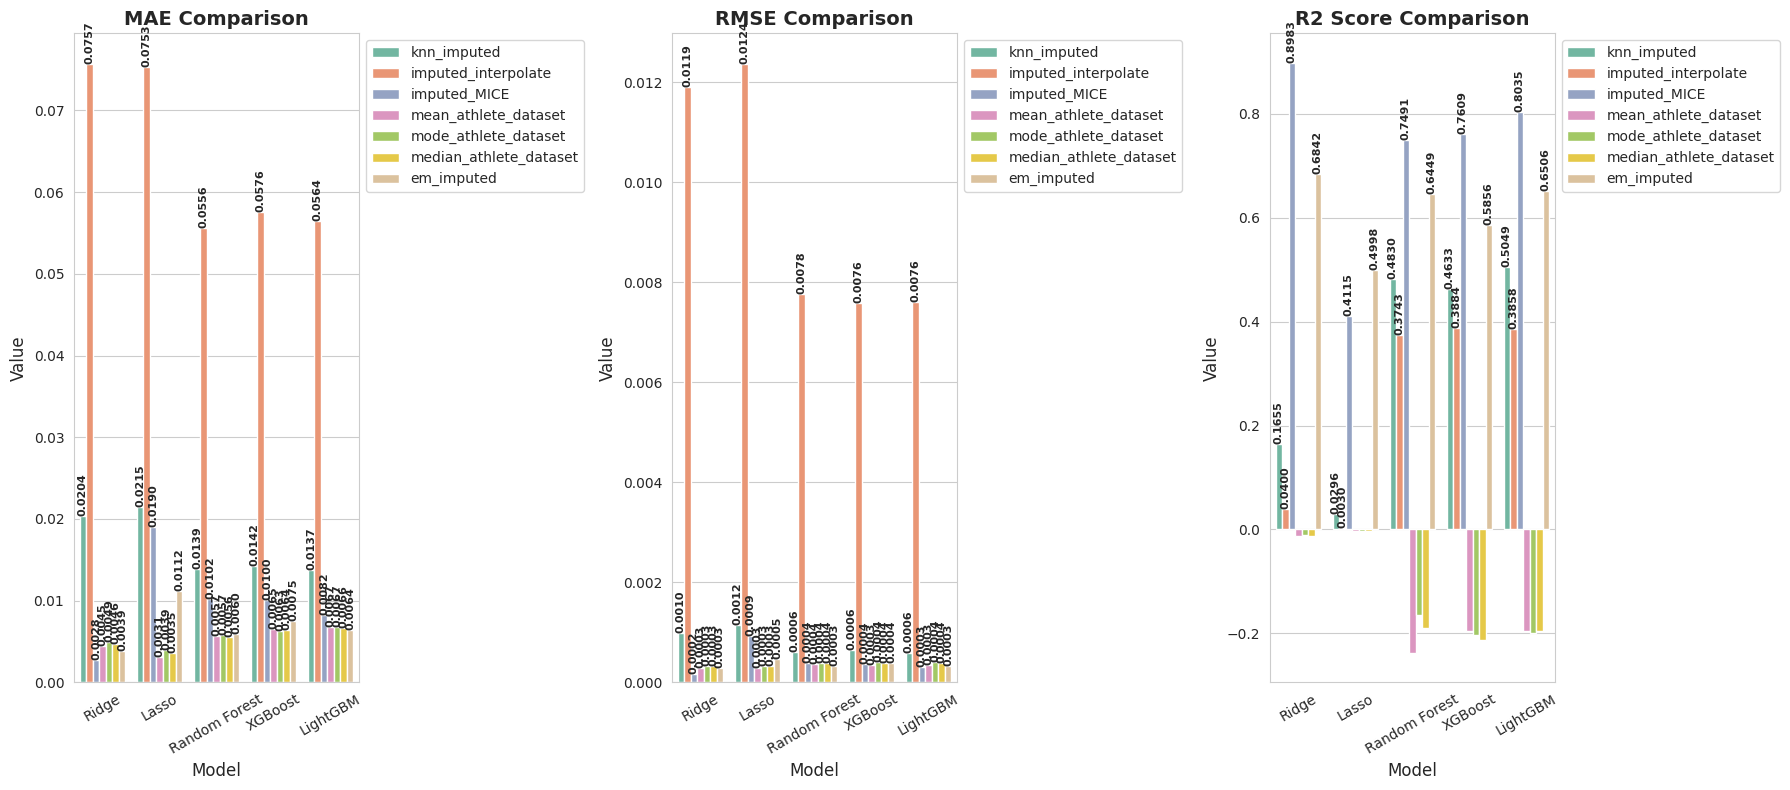

Saved Cleaned Model Performance Plot: /content/drive/MyDrive/ML_Project_Dataset/Performance_Metrics/cleaned_model_performance.png


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Define save directory
plot_save_dir = "/content/drive/MyDrive/ML_Project_Dataset/Performance_Metrics/"

# Ensure the directory exists
os.makedirs(plot_save_dir, exist_ok=True)

# Load the dataset
metrics_df = pd.read_csv("model_comparison_table.csv")

# Set seaborn style
sns.set_style("whitegrid")

# Define color palette
palette = sns.color_palette("Set2")

# Melt the dataframe to long format
metrics_melted = metrics_df.melt(id_vars=["Dataset", "Model"],
                                 value_vars=["MAE", "RMSE", "R2 Score"],
                                 var_name="Metric", value_name="Value")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8))  # Wider for better spacing
metrics = ["MAE", "RMSE", "R2 Score"]

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(data=metrics_melted[metrics_melted["Metric"] == metric],
                x="Model", y="Value", hue="Dataset", ax=ax, palette=palette)

    ax.set_title(f"{metric} Comparison", fontsize=14, fontweight='bold')
    ax.set_xlabel("Model", fontsize=12)
    ax.set_ylabel("Value", fontsize=12)
    ax.tick_params(axis="x", rotation=30)  # Rotate for better visibility
    # ax.legend(loc="upper left", fontsize=10)  # Move legend for clarity
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


    # Add value labels
    for p in ax.patches:
        if p.get_height() > 0:  # Avoid negative bars cluttering
            ax.annotate(f'{p.get_height():.4f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=8, fontweight='bold', rotation = 90)

# Adjust layout
# Create one legend for the entire figure
# fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4)
plt.tight_layout()

# Save the plot
combined_plot_path = os.path.join(plot_save_dir, "cleaned_model_performance.png")
plt.savefig(combined_plot_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

print(f"Saved Cleaned Model Performance Plot: {combined_plot_path}")
